In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import EoN

In [2]:
plt.style.use("seaborn-whitegrid")

In [3]:
N=10**5
G=nx.barabasi_albert_graph(N, 5) #create a barabasi-albert graph

tmax = 20
iterations = 5  #run 5 simulations
tau = 0.1           #transmission rate
gamma = 1.0    #recovery rate
rho = 0.005      #random fraction initially infected

for counter in range(iterations): #run simulations
    t, S, I, R = EoN.fast_SIR(G, tau, gamma, rho=rho, tmax = tmax)
    if counter == 0:
        plt.plot(t, I, color = 'k', alpha=0.3, label='Simulation')
    plt.plot(t, I, color = 'k', alpha=0.3)
    
#Now compare with ODE predictions.  Read in the degree distribution of G
#and use rho to initialize the various model equations.
#There are versions of these functions that allow you to specify the
#initial conditions rather than starting from a graph.



#we expect a homogeneous model to perform poorly because the degree
#distribution is very heterogeneous
t, S, I, R = EoN.SIR_homogeneous_pairwise_from_graph(G, tau, gamma, rho=rho, tmax = tmax)
plt.plot(t, I, '-.', label = 'Homogeneous pairwise', linewidth = 5)

#meanfield models will generally overestimate SIR growth because they
#treat partnerships as constantly changing.
t, S, I, R = EoN.SIR_heterogeneous_meanfield_from_graph(G, tau, gamma, rho=rho, tmax=tmax)
plt.plot(t, I, ':', label = 'Heterogeneous meanfield', linewidth = 5)

#The EBCM model does not account for degree correlations or clustering
t, S, I, R = EoN.EBCM_from_graph(G, tau, gamma, rho=rho, tmax = tmax)
plt.plot(t, I, '--', label = 'EBCM approximation', linewidth = 5)

#the preferential mixing model captures degree correlations.
t, S, I, R = EoN.EBCM_pref_mix_from_graph(G, tau, gamma, rho=rho, tmax=tmax)
plt.plot(t, I, label = 'Pref mix EBCM', linewidth=5, dashes=[4, 2, 1, 2, 1, 2])

plt.xlabel('$t$',fontweight="bold")
plt.ylabel('Number infected',fontweight="bold")
legend = plt.legend(loc=5,bbox_to_anchor=(1.5,0.5))
frame = legend.get_frame()
frame.set_facecolor("white")
frame.set_linewidth(0)
plt.legend()
#plt.savefig('SIR_BA_model_vs_sim.png')
plt.clf()


<Figure size 432x288 with 0 Axes>

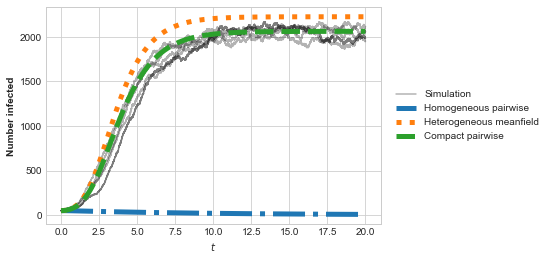

C:\Users\hanna\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


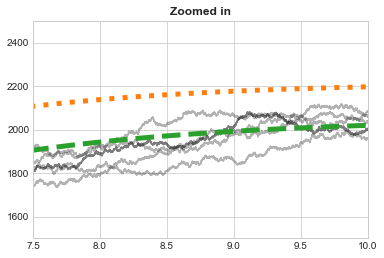

In [9]:
#Now run for SIS.   Simulation is much slower so need smaller network
N=10**4
G=nx.barabasi_albert_graph(N, 5) #create a barabasi-albert graph
for counter in range(iterations):
    t, S, I = EoN.fast_SIS(G, tau, gamma, rho=rho, tmax = tmax)
    if counter == 0:
        plt.plot(t, I, color = 'k', alpha=0.3, label='Simulation')
    plt.plot(t, I, color = 'k', alpha=0.3)

#Now compare with ODE predictions.  Read in the degree distribution of G
#and use rho to initialize the various model equations.
#There are versions of these functions that allow you to specify the
#initial conditions rather than starting from a graph.

#we expect a homogeneous model to perform poorly because the degree
#distribution is very heterogeneous
t, S, I = EoN.SIS_homogeneous_pairwise_from_graph(G, tau, gamma, rho=rho, tmax = tmax)
plt.plot(t, I, '-.', label = 'Homogeneous pairwise', linewidth = 5)

t, S, I = EoN.SIS_heterogeneous_meanfield_from_graph(G, tau, gamma, rho=rho, tmax=tmax)
plt.plot(t, I, ':', label = 'Heterogeneous meanfield', linewidth = 5)

t, S, I = EoN.SIS_compact_pairwise_from_graph(G, tau, gamma, rho=rho, tmax=tmax)
plt.plot(t, I, '--', label = 'Compact pairwise', linewidth = 5)

plt.xlabel('$t$',fontweight="bold")
plt.ylabel('Number infected',fontweight="bold")
legend = plt.legend(loc=5,bbox_to_anchor=(1.5,0.5))
frame = legend.get_frame()
frame.set_facecolor("white")
frame.set_linewidth(0)
plt.show()

#Zoom in
N=10**4
G=nx.barabasi_albert_graph(N, 5) #create a barabasi-albert graph
for counter in range(iterations):
    t, S, I = EoN.fast_SIS(G, tau, gamma, rho=rho, tmax = tmax)
    if counter == 0:
        plt.plot(t, I, color = 'k', alpha=0.3, label='Simulation')
    plt.plot(t, I, color = 'k', alpha=0.3)
    
t, S, I = EoN.SIS_homogeneous_pairwise_from_graph(G, tau, gamma, rho=rho, tmax = tmax)
plt.plot(t, I, '-.', label = 'Homogeneous pairwise', linewidth = 5)

t, S, I = EoN.SIS_heterogeneous_meanfield_from_graph(G, tau, gamma, rho=rho, tmax=tmax)
plt.plot(t, I, ':', label = 'Heterogeneous meanfield', linewidth = 5)

t, S, I = EoN.SIS_compact_pairwise_from_graph(G, tau, gamma, rho=rho, tmax=tmax)
plt.plot(t, I, '--', label = 'Compact pairwise', linewidth = 5)
ax2 = plt.subplot()
plt.axis(xmin=7.5,xmax=10,ymin=1500,ymax=2500)  

ax2.set_title('Zoomed in',fontweight="bold")
plt.show()
#plt.savefig('SIS_BA_model_vs_sim.png')